In [1]:
import numpy
import six.moves.cPickle as pickle
import theano

Using gpu device 0: Quadro K1100M (CNMeM is enabled with initial size: 95.0% of memory, cuDNN not available)


In [2]:
fileObject = open('data/best_SdA_model.pkl','r')
data_set = pickle.load(fileObject)

params = [numpy.array(dataset) for dataset in data_set]

In [3]:
fileObject1 = open('data/samples','r')
samples = pickle.load(fileObject1)

time_series = numpy.array(samples)

In [13]:
def sigmoid(z):
    s = 1.0 / (1.0 + numpy.exp(-1.0 * z))
    return s

In [18]:
def get_hidden_values(input, W, b, active = None):
    if not active:
        return numpy.dot(input, W) + b
    else:
        return active(numpy.dot(input, W) + b)

In [19]:
def get_reconstructed_values(input, W_prime, b_prime, active = None):
    if not active:
        return numpy.dot(input, W_prime) + b_prime
    else:
        return active(numpy.dot(input, W_prime) + b_prime)

In [23]:
# first hidden layer
hidden1 = get_hidden_values(time_series, params[0], params[1], active=sigmoid)

In [24]:
# second hidden layer
hidden2 = get_hidden_values(hidden1, params[4], params[5], active=sigmoid)

In [26]:
# second hidden layer
hidden3 = get_hidden_values(hidden2, params[7], params[8], active=sigmoid)

In [28]:
recons2 = get_reconstructed_values(hidden3, params[7].T, params[9], active=sigmoid)

In [30]:
recons1 = get_reconstructed_values(recons2, params[4].T, params[6], active=sigmoid)

In [33]:
print recons1.shape

(10000, 128)


In [34]:
output = get_reconstructed_values(recons1, params[3], params[2])

In [35]:
print output

[[  44.18210647   40.70885841   37.36137831 ...,  122.48163969
    67.38726292   66.53999008]
 [  43.61280934   40.96794265   47.3722912  ...,  117.78199663
    61.90707757   60.42549291]
 [ 116.38910655  106.48131931   96.56451429 ...,  142.70257056
   127.83321235  120.55652164]
 ..., 
 [  54.53111192   52.09643556   60.03379702 ...,  134.53418435
   116.75319035  121.83923671]
 [  53.11201776   46.68364765   43.30346116 ...,   83.10310265
    83.39908072   89.37259951]
 [  83.17016643   85.78787477   89.30835239 ...,   96.99104062
    90.52867957   93.38487222]]


In [36]:
print time_series

[[ 43  41  44 ..., 128  46  46]
 [ 38  44  44 ..., 133  45  56]
 [167 124 124 ..., 162 148 158]
 ..., 
 [ 46  46  54 ..., 109 106  98]
 [ 39  79  39 ...,  96  93  92]
 [ 91  91  87 ...,  96  93  97]]


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

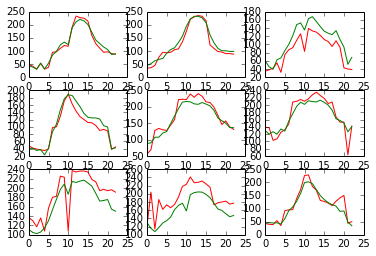

In [62]:
fig = plt.figure()
Xaxis = range(23)
for i in range(3):
    for j in range(3):
        ax = plt.subplot2grid((3,3), (i, j))
        plt.plot(Xaxis, time_series[i * 3 + j+ 834], 'r')
        plt.plot(Xaxis, output[i * 3 + j + 834], 'g')
        

In [53]:
print hidden3

[[  3.31793172e-03   1.46789723e-01   9.44106748e-01 ...,   6.99610564e-01
    9.99843312e-01   9.97480403e-01]
 [  1.02871343e-03   7.79637835e-02   5.20456153e-04 ...,   2.82656224e-01
    9.96797477e-01   9.99595875e-01]
 [  8.42913440e-01   3.30810571e-03   9.79061191e-01 ...,   9.96865459e-01
    2.06552321e-04   8.69570727e-01]
 ..., 
 [  9.89076814e-04   9.95428138e-01   9.64034794e-01 ...,   1.80547981e-03
    9.35822571e-01   9.39487888e-01]
 [  2.91626392e-02   4.19449461e-03   4.33073634e-01 ...,   3.01407476e-03
    9.99975134e-01   3.54682687e-03]
 [  7.88322888e-03   3.63082483e-03   1.90222024e-03 ...,   3.89658858e-02
    1.41492744e-02   3.70924859e-03]]


In [54]:
print hidden3[0]

[  3.31793172e-03   1.46789723e-01   9.44106748e-01   9.99879534e-01
   5.45939972e-01   1.37341588e-03   9.58007234e-01   6.57157752e-01
   2.58267147e-04   9.96244503e-01   8.04831500e-02   3.17586494e-01
   1.00000000e+00   6.99610564e-01   9.99843312e-01   9.97480403e-01]
